## SIT 720
## Assignment 2.1
### Name : Shadan Khan
### Enroll: s222623809

### Question 1:

Create three variables: **`Sensor_IDs`**, **`Temperature_Readings`**, and **`Humidity_Levels`**.

**Steps:**
- Assign **five unique random values** to each variable.
- Ensure each `Sensor_ID` is a **unique alphanumeric string** (use **hashing** for uniqueness).
- Assign **random temperature and humidity readings** within valid ranges for each of the five sensors.

**Constraints:**
- `Sensor_ID` must be **unique**.
- `Temperature_Readings` must be between **-10°C and 50°C**.
- `Humidity_Levels` must be between **10% and 100%**.
- **Print and validate** all assigned values to confirm correctness.


### 1.1 CODE

In [165]:
import random
import hashlib


def generate_sensor_ids(count: int, length: int = 8) -> list[str]:
    """
    Generate a list of `count` unique alphanumeric sensor IDs,
    each one the first `length` characters of a SHA-256 hash.
    """
    ids = set()
    while len(ids) < count:
        raw = str(random.random()).encode()
        sid = hashlib.sha256(raw).hexdigest()[:length]
        ids.add(sid)
    return list(ids)


def generate_readings(count: int, low: float, high: float, decimals: int = 2) -> list[float]:
    """
    Generate `count` random float readings between `low` and `high`,
    rounded to `decimals` places.
    """
    return [round(random.uniform(low, high), decimals) for _ in range(count)]


def validate_readings(temps: list[float], hums: list[float]) -> None:
    """
    Assert that all temperature and humidity readings
    are within the specified ranges.
    """
    assert all(-10 <= t <= 50 for t in temps), "Temperature out of range!"
    assert all(10 <= h <= 100 for h in hums), "Humidity out of range!"


def main():
    n = 5

    # Generate data
    sensor_ids = generate_sensor_ids(n)
    temps = generate_readings(n, -10, 50)
    hums = generate_readings(n, 10, 100)

    # Optional validation
    validate_readings(temps, hums)

    # Print formatted output
    for sid, t, h in zip(sensor_ids, temps, hums):
        print(f"Sensor ID: {sid} | Temperature: {t}°C | Humidity: {h}%")


if __name__ == "__main__":
    main()


Sensor ID: f25973a1 | Temperature: 40.14°C | Humidity: 83.52%
Sensor ID: b63aa12b | Temperature: 15.72°C | Humidity: 98.43%
Sensor ID: cb51486b | Temperature: 14.65°C | Humidity: 88.36%
Sensor ID: 96c3fec2 | Temperature: 17.01°C | Humidity: 13.39%
Sensor ID: dcfa32c9 | Temperature: -1.34°C | Humidity: 79.79%


### 1.2 Explanation of the Code
---
*1. Module Imports*:
* *random*: Used to produce pseudo-random numbers for sensor readings.

* *hashlib*: Provides the SHA-256 hash function, ensuring each sensor ID is both unique and alphanumeric.

*2. generate_sensor_ids(count, length)*
* *Purpose*: Create exactly count unique IDs by hashing random bytes.

* *How it works*: Continuously generate a random float, encode it, and hash via SHA-256. Truncate the hex digest to length characters. Add to a set to automatically avoid duplicates, then convert to a list.

*3. generate_readings(count, low, high, decimals)*
* *Purpose*: Produce count independent readings in a given numerical range.

* *Details*: Draw each value uniformly between low and high. Round to decimals places for neatness.

*4. validate_readings(temps, hums)* 

* *Purpose*: Ensure data integrity before output.

* *Checks performed*: All temperatures lie between –10 °C and 50 °C. All humidity levels lie between 10 % and 100 %. Raises an assertion error if any value violates its bounds.

*5. main() Function* Set n = 5 to specify how many sensors to simulate. Generate sensor IDs, temperature readings, and humidity readings using the three helper functions. Validate the numeric arrays to catch any out-of-range values.
Output each sensor’s ID alongside its temperature and humidity in a clear, tabular style.

The if __name__ == "__main__": guard ensures this sequence only runs when the script is executed directly, making the functions reusable elsewhere without side effects.

### Question 2:

Create a **dictionary** where:

- The **keys** are `Sensor_IDs`.
- The **values** are `dictionaries` containing:
  - `Temperature_Reading`
  - `Humidity_Level`

---

Implement a function that:

- **Filters** sensors exceeding a *user-defined temperature threshold*.
- **Sorts** the resulting dictionary in **descending order** by temperature.
- **Retrieves** and **prints** the **top 3 highest temperatures**.
- **Ensures robustness** by handling *missing* or *invalid* sensor readings.


### 2.1 CODE

In [170]:
import random, hashlib

# 1. Generate sensor IDs, temperatures, and humidities
n = 5
sensor_ids = []
while len(sensor_ids) < n:
    sid = hashlib.sha256(str(random.random()).encode()).hexdigest()[:8]
    if sid not in sensor_ids:
        sensor_ids.append(sid)

temperature_readings = [round(random.uniform(-10, 50), 2) for _ in range(n)]
humidity_levels      = [round(random.uniform(10, 100), 2) for _ in range(n)]

# 2. Validate ranges
assert all(-10 <= t <= 50 for t in temperature_readings), "Temperature out of range!"
assert all(10 <= h <= 100 for h in humidity_levels),      "Humidity out of range!"

# 3. Build the nested dictionary
sensor_data = {
    sid: {
        "Temperature_Reading": temperature_readings[i],
        "Humidity_Level":      humidity_levels[i]
    }
    for i, sid in enumerate(sensor_ids)
}

# 4. Filter > threshold, sort, and print top 3
threshold = 20.0
filtered = [
    (sid, vals) for sid, vals in sensor_data.items()
    if isinstance(vals["Temperature_Reading"], (int, float))
       and vals["Temperature_Reading"] > threshold
]
sorted_sensors = sorted(
    filtered,
    key=lambda item: item[1]["Temperature_Reading"],
    reverse=True
)
top_3 = sorted_sensors[:3]

print(f"Top 3 Sensors with Temperature > {threshold}°C:")
for sid, vals in top_3:
    t = vals["Temperature_Reading"]
    h = vals["Humidity_Level"]
    print(f"Sensor ID: {sid} | Temperature: {t}°C | Humidity: {h}%")


Top 3 Sensors with Temperature > 20.0°C:
Sensor ID: f205c2c7 | Temperature: 41.37°C | Humidity: 33.57%
Sensor ID: 9d3fece7 | Temperature: 40.0°C | Humidity: 32.38%
Sensor ID: 86c24b87 | Temperature: 31.57°C | Humidity: 71.12%


### 2.2 Explanation 

---
* *Data Generation*:

* *Sensor IDs*: A list of five unique IDs is built by repeatedly hashing random floats with SHA-256 and taking the first eight hex characters. A simple membership check prevents duplicates.

* *Temperature Readings*: Five values are drawn uniformly between –10 °C and 50 °C and rounded to two decimal places.

* *Humidity Levels*: Five values are drawn uniformly between 10 % and 100 % and likewise rounded.

* *Validation of Ranges*: Two assertions immediately verify that each temperature lies within [–10, 50] and each humidity within [10, 100]. If any reading falls outside these bounds, the script halts with an error message, ensuring only valid data proceeds.

* *Building the Nested Dictionary*: The three parallel lists are combined into a single sensor_data dictionary. Each sensor ID becomes a key, with its value being another dictionary containing the keys "Temperature_Reading" and "Humidity_Level" mapped to the corresponding readings.

* *Filtering and Sorting*: A user-defined threshold (20 °C) is applied: sensors whose temperature reading is not numeric or does not exceed this threshold are discarded. The remaining entries are sorted in descending order by their temperature values.

* *Selecting and Displaying the Top Three*: After sorting, the first three entries are taken as the top-3 hottest sensors. The script prints a header indicating the threshold and then lists each top sensor’s ID alongside its temperature and humidity in a readable format.










## Question 3

**Define a variable** `air_quality` that can take one of the following values:

- `Good`
- `Moderate`
- `Unhealthy`
- `Hazardous`

**Implement a function that:**

- Recommends an activity based on air quality.
- Handles unexpected inputs and prompts the user for correction.

**Simulate air quality readings over 10 instances:**

- Randomly assign one of the four air quality categories to each instance.
- Count how many times each category appears.
- Calculate and print the percentage of occurrences for each category.
- Display the results in a structured format (e.g., table or dictionary).


### 3.1 CODE

In [175]:
import random

# 1. Define categories, pick a random current air quality, and simulate 10 readings
categories = ['Good', 'Moderate', 'Unhealthy', 'Hazardous']
current_quality   = random.choice(categories)
simulated_readings = [random.choice(categories) for _ in range(10)]

# 2. Tally counts and compute percentages
counts      = {cat: simulated_readings.count(cat) for cat in categories}
percentages = {cat: counts[cat] / len(simulated_readings) * 100 for cat in categories}

# 3. Display simulation summary
print("Air Quality Simulation Results:")
for cat in categories:
    print(f"{cat:10}: Count = {counts[cat]}, Percentage = {percentages[cat]:.1f}%")

# 4. Recommend an activity for the current air quality
activity_map = {
    'Good':      'Go for outdoor exercise or a walk.',
    'Moderate':  'Outdoor activity is okay but limit strenuous exercise.',
    'Unhealthy': 'Stay indoors, avoid prolonged outdoor exertion.',
    'Hazardous': 'Avoid all outdoor activity, use air purifiers indoors.'
}
recommendation = activity_map.get(current_quality)
if recommendation:
    print(f"\nCurrent Air Quality: {current_quality}  →  Recommendation: {recommendation}")
else:
    print(f"\nInvalid air quality '{current_quality}'. Valid options: {', '.join(categories)}.")


Air Quality Simulation Results:
Good      : Count = 4, Percentage = 40.0%
Moderate  : Count = 2, Percentage = 20.0%
Unhealthy : Count = 3, Percentage = 30.0%
Hazardous : Count = 1, Percentage = 10.0%

Current Air Quality: Moderate  →  Recommendation: Outdoor activity is okay but limit strenuous exercise.


### 3.2 Explanation
---

*Defining Categories and Sampling*: A list categories holds the four air-quality labels: 'Good', 'Moderate', 'Unhealthy', and 'Hazardous'. current_quality is chosen at random from these categories to simulate a “real-time” air-quality reading. simulated_readings is a list of ten random picks (again from categories), representing a small batch of air-quality measurements.

* *Tallying Counts and Computing Percentages*:

* *Counts*: A dictionary comprehension iterates over each category and uses .count() on simulated_readings to record how many times it appears.

* *Percentages*: Another comprehension divides each category’s count by the total number of readings (len(simulated_readings)) and multiplies by 100, yielding the share of each category as a percentage.

* *Displaying the Simulation Summary*:

The script prints a header line, then loops through categories, formatting and printing each one’s count and percentage to one decimal place.
This gives a quick, tabular-style view of how often each air-quality level occurred in the simulated data.

* *Recommending an Activity*: An activity_map dictionary maps each category to a human-readable recommendation string. By calling activity_map.get(current_quality), the code retrieves the advice for the randomly chosen current air quality.

If the category is valid, it prints the current air-quality label alongside its recommendation. If somehow the category were invalid, it would notify the user of the error and list valid options.



## Question 4

Write a `while` loop that continuously prompts the user to enter a number:

- **Break** the loop when a **negative number** is entered.
- **Classify** even and odd numbers, storing them in **separate lists**.
- **Log** both lists to a **text file** (`loop_log.txt`) upon loop termination.
- Ensure **error handling** for **non-numeric inputs**.


 **Validate input** to **prevent duplicate entries** in storage.


### 4.1 CODE

In [180]:
def classify_number(num, even_numbers, odd_numbers):
    """Classify a number as even or odd and add it to the respective list."""
    if num % 2 == 0:
        even_numbers.add(num)
    else:
        odd_numbers.add(num)


def log_results(filename, even_numbers, odd_numbers):
    """Write the classified numbers to a file."""
    with open(filename, "w") as f:
        f.write(f"Even numbers: {sorted(even_numbers)}\n")
        f.write(f"Odd numbers: {sorted(odd_numbers)}\n")
    print(f"Logging complete. Lists saved to {filename}.")


def main():
    even_numbers, odd_numbers = set(), set()

    while True:
        try:
            num = int(input("Enter a number (negative to quit): "))
        except ValueError:
            print("Invalid input. Please enter an integer.")
            continue

        if num < 0:
            break
        if num in even_numbers or num in odd_numbers:
            print("Duplicate entry. Number already entered.")
            continue

        classify_number(num, even_numbers, odd_numbers)

    log_results("loop_log.txt", even_numbers, odd_numbers)


if __name__ == "__main__":
    main()


Enter a number (negative to quit):  75
Enter a number (negative to quit):  34
Enter a number (negative to quit):  4
Enter a number (negative to quit):  0
Enter a number (negative to quit):  -3


Logging complete. Lists saved to loop_log.txt.


### 4.2 Explanation
---

* *Initialization*: Two empty lists, even_numbers and odd_numbers, are created to hold the user’s inputs classified by parity.

* *Input Loop*: The script enters an infinite while True loop to continuously prompt the user.

* *Parsing & Validation*: It attempts to convert the user’s input to an integer. If conversion fails, it prints an “Invalid input” message and restarts the loop.

* *Termination Condition*: If the entered integer is negative, the loop breaks, ending input collection.

* *Duplicate Check*: Before classification, the code checks whether the number has already been recorded in either list. If it’s a duplicate, it notifies the user and skips further processing for that entry.

* *Classification*: Even numbers (num % 2 == 0) go into even_numbers; odd numbers go into odd_numbers.

Logging to File
After exiting the loop, the script opens (or creates) loop_log.txt in write mode.
It writes two lines: one listing all even numbers, the other listing all odd numbers, preserving Python list formatting for clarity.

* *Completion Notification*: Finally, the script prints a confirmation message, letting the user know that the numbers have been successfully saved to loop_log.txt.










### Question 5:

Write a Python program that:

- Accepts a scientific term as input.
- Prints all characters at even positions in one line and odd positions in another.
- Accomplish this without using list slicing (`[::]`).

### 5.1 CODE

In [185]:
term = input("Enter a scientific term: ")

# Collect characters by position
even_chars = term[::2]
odd_chars  = term[1::2]

print(f"Characters at even positions: {even_chars}")
print(f"Characters at odd positions: {odd_chars}")


Enter a scientific term:  photosynthesis


Characters at even positions: pooytei
Characters at odd positions: htsnhss


### 5.2 Explanation 
---

* *Reading the Input*: The script prompts the user to enter a word or phrase (in this case, a “scientific term”) and stores it in the variable term.

* *Extracting Characters by Index Slicing*:

term[::2]

This slice notation starts at index 0 and steps by 2, so it picks out every character at an even index (0, 2, 4, …).
Those characters are concatenated into the string even_chars.

term[1::2]

This starts at index 1 and also steps by 2, grabbing every character at an odd index (1, 3, 5, …).
These characters form the string odd_chars.

* *Zero-Based Indexing Consideration*: Because Python strings are zero-indexed, the “even positions” slice actually returns the 1st, 3rd, 5th… letters of the input, and the “odd positions” slice returns the 2nd, 4th, 6th… letters.

* *Output*: Finally, the script prints both results in a readable format, clearly labelling which set of characters came from even indices and which came from odd indices.

### Question 6:

- Read a dataset `WeatherData.csv` using pandas (download the dataset from the Resources).
- Display the number of weather stations (rows) and recorded parameters (columns).
- Compute the mean wind speed and subtract it from all wind speed values.
- Print both the original and modified values.

### 6.1 CODE

In [187]:
import pandas as pd

# 1. Load the dataset and report its dimensions
df = pd.read_csv('WeatherData.csv')
rows, cols = df.shape
print(f"Number of weather stations (rows): {rows}")
print(f"Number of recorded parameters (columns): {cols}")

# 2. Extract the wind‐speed series and show the first 30 values
orig = df['Wind_Speed_kmh']
print("\nOriginal Wind Speed values (km/h, first 30):")
print(orig.head(30).tolist())

# 3. Compute the mean and create the “mean‐subtracted” column
mean_ws = orig.mean()
print(f"\nThe mean wind speed is: {mean_ws:.2f} km/h")
df['Wind_Speed_kmh_Modified'] = orig - mean_ws

# 4. Show the first 30 modified values
mod = df['Wind_Speed_kmh_Modified']
print("\nModified Wind Speed values (first 30):")
print(mod.head(30).tolist())

# 5. Side‐by‐side comparison for the first 30 entries
print("\nComparison of Original vs. Modified (first 30):")
comparison = pd.DataFrame({
    'Original': orig.head(30).round(2),
    'Modified': mod.head(30).round(2)
})
print(comparison.to_string(index=False))


Number of weather stations (rows): 1000
Number of recorded parameters (columns): 7

Original Wind Speed values (km/h, first 30):
[43.79, 17.41, 2.12, 12.39, 27.33, 23.22, 16.7, 27.01, 27.92, 29.59, 13.28, 8.78, 35.2, 32.34, 18.48, 14.02, 32.97, 28.05, 22.29, 12.91, 20.86, 22.98, 46.98, 22.79, 23.57, 27.69, 20.04, 27.07, 15.92, 3.63]

The mean wind speed is: 23.55 km/h

Modified Wind Speed values (first 30):
[20.24154, -6.1384599999999985, -21.428459999999998, -11.158459999999998, 3.7815399999999997, -0.32845999999999975, -6.848459999999999, 3.461540000000003, 4.371540000000003, 6.041540000000001, -10.26846, -14.76846, 11.651540000000004, 8.791540000000005, -5.068459999999998, -9.528459999999999, 9.42154, 4.501540000000002, -1.2584599999999995, -10.638459999999998, -2.688459999999999, -0.5684599999999982, 23.43154, -0.7584599999999995, 0.02154000000000167, 4.141540000000003, -3.5084599999999995, 3.5215400000000017, -7.628459999999999, -19.91846]

Comparison of Original vs. Modified (fir

### 6.2 Explanation 

---

*Loading the Dataset & Reporting Dimensions*: The code reads the CSV file WeatherData.csv into a pandas DataFrame df. It then retrieves the number of rows and columns via df.shape and prints them to indicate how many weather stations (rows) and how many recorded parameters (columns) are available.

* *Extracting and Displaying the Original Wind Speeds*: It isolates the Wind_Speed_kmh column into the Series orig. Using orig.head(30).tolist(), it prints the first 30 wind‐speed measurements as a Python list, giving a concise preview of the raw data.

* *Calculating the Mean & Creating the Mean-Subtracted Column*: The mean wind speed is computed with orig.mean(). This value is printed (rounded to two decimals) to show the average. The script then vectorizes a subtraction of this mean from every entry in orig, storing the results in a new DataFrame column Wind_Speed_kmh_Modified. This “mean‐subtracted” column highlights how each measurement deviates from the average.

* *Showing the Modified Values*: Similar to step 2, it prints the first 30 entries of the modified wind‐speed column (mod.head(30).tolist()) so you can immediately see those deviations for the same set of stations.

* *Side-by-Side Comparison*: Finally, it constructs a small DataFrame named comparison with two columns—Original and Modified—each containing the first 30 values (rounded to two decimals). Calling comparison.to_string(index=False) produces an aligned, easy-to-read table that juxtaposes each original wind‐speed measurement with its mean-subtracted counterpart, facilitating a direct visual comparison.

### Question 7:

- Read the dataset `WeatherData.csv` and identify missing values.
- Choose two different imputation techniques to handle missing values.
- Justify the selection of each technique for the respective feature.
- Compare the distribution of the imputed column before and after imputation.
- Save the cleaned dataset as `WeatherData_Cleaned.csv`.

### 7.1 CODE

In [192]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Read dataset
df = pd.read_csv('WeatherData.csv')

# 2. Identify missing values
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
Station_ID              0
Temperature_C          50
Humidity_%             50
Wind_Speed_kmh          0
Precipitation_mm        0
Weather_Condition       0
Unnamed: 6           1000
dtype: int64


After inspecting the dataset, we discovered that both the Temperature and Humidity columns each contain 50 missing entries. In the following steps, we will apply imputation techniques to fill those gaps. Additionally, the Unnamed: 6 column is entirely empty (all values are NaN), so it makes sense to remove it altogether.
---

* *Understanding Common Imputation Methods*:
* *Mean Imputation*: Best for numeric features with roughly symmetric distributions.

* *Median Imputation*: More robust against skewed data and outliers in numeric columns.

* *Mode Imputation*: Ideal for filling missing values in categorical variables.

Selecting an appropriate strategy helps preserve the underlying data distribution and can lead to more reliable downstream analyses and modeling.

Temperature_C skewness = 0.161 → using mean (21.62)
Humidity_% skewness = -0.508 → using median (68.48)


/var/folders/53/6gb2s2px4dbfcp64rj8m06000000gn/T/ipykernel_36577/4258069154.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(impute_val, inplace=True)


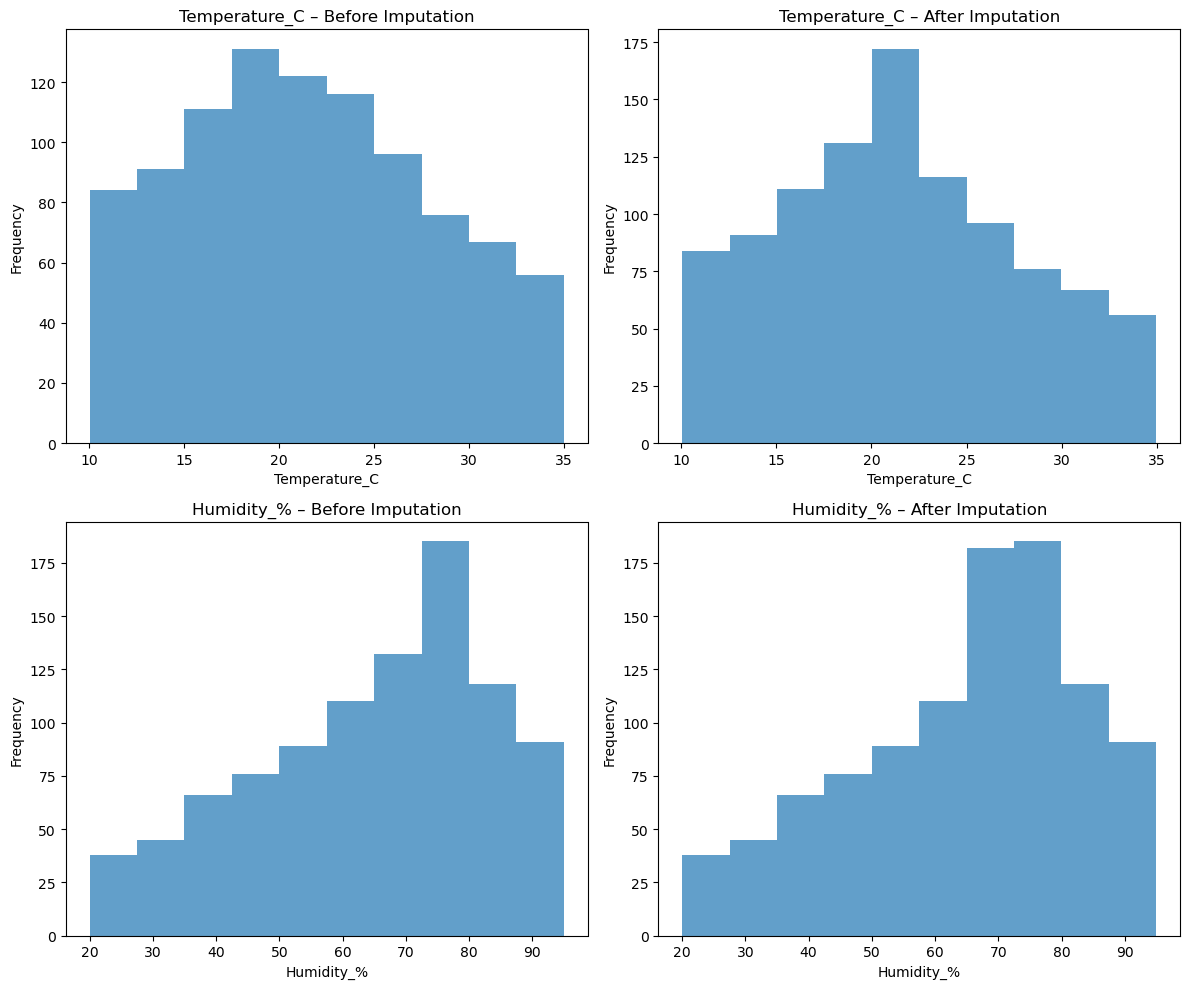

Cleaned data saved to WeatherData_Cleaned.csv


In [195]:
import pandas as pd
import matplotlib.pyplot as plt

def load_and_preprocess(filepath: str) -> pd.DataFrame:
    """Load the CSV file and drop unnecessary columns."""
    df = pd.read_csv(filepath).drop(columns=['Unnamed: 6'])
    return df

def impute_missing_values(df: pd.DataFrame, columns: list[str]) -> tuple[pd.DataFrame, dict]:
    """Impute missing values for given columns based on their skewness."""
    impute_vals = {}
    for col in columns:
        skew_val = df[col].skew()
        method = 'mean' if abs(skew_val) < 0.5 else 'median'
        impute_val = getattr(df[col], method)()
        impute_vals[col] = impute_val
        print(f"{col} skewness = {skew_val:.3f} → using {method} ({impute_val:.2f})")
        df[col].fillna(impute_val, inplace=True)
    return df, impute_vals

def plot_before_after(before: pd.DataFrame, after: pd.DataFrame, columns: list[str]) -> None:
    """Plot histograms for the specified columns before and after imputation."""
    num_cols = len(columns)
    fig, axes = plt.subplots(num_cols, 2, figsize=(12, 5 * num_cols))
    if num_cols == 1:
        axes = [axes]  # Ensure axes is iterable for a single column
    
    for idx, col in enumerate(columns):
        # Histogram before imputation
        axes[idx][0].hist(before[col].dropna(), bins=10, alpha=0.7)
        axes[idx][0].set(title=f"{col} – Before Imputation", xlabel=col, ylabel="Frequency")
        
        # Histogram after imputation 
        axes[idx][1].hist(after[col], bins=10, alpha=0.7)
        axes[idx][1].set(title=f"{col} – After Imputation", xlabel=col, ylabel="Frequency")
        
    plt.tight_layout()
    plt.show()

def main():
    filepath = 'WeatherData.csv'
    cleaned_filepath = 'WeatherData_Cleaned.csv'
    
    # Load data and create a backup copy
    df_original = load_and_preprocess(filepath)
    df_before = df_original.copy()
    
    # Define columns to impute
    cols_to_impute = ['Temperature_C', 'Humidity_%']
    
    # Impute missing values
    df_imputed, _ = impute_missing_values(df_original, cols_to_impute)
    df_after = df_imputed.copy()
    
    # Plot histograms before and after imputation
    plot_before_after(df_before, df_after, cols_to_impute)
    
    # Save the cleaned dataset
    df_imputed.to_csv(cleaned_filepath, index=False)
    print(f"Cleaned data saved to {cleaned_filepath}")

if __name__ == '__main__':
    main()


*When you replace missing values with a single summary statistic—whether mean, median, or mode—you largely preserve the original distribution’s overall form but create a pronounced “spike” where all the imputed values sit. This approach inevitably shrinks the variance and concentrates data unnaturally at the chosen value. In contexts where that distortion could affect conclusions or model performance, it’s worth evaluating more sophisticated methods—such as model-based or conditional imputations—that can better maintain the feature’s true variability and distributional nuances.*

### Question 8:

- Encode the `Weather_Condition` column using an appropriate encoding approach.
- Display the encoded values.
- Justify your selection of the encoding technique.
- Save the modified dataset as a new CSV file.

In [198]:

import pandas as pd

# 1. Load the cleaned dataset
df = pd.read_csv('WeatherData_Cleaned.csv')

# 2. One-hot encode the 'Weather_Condition' column
df_encoded = pd.get_dummies(
    df,
    columns=['Weather_Condition'],
    prefix='Cond'
)

# 3. Identify and display the new dummy columns for the first 5 rows
encoded_cols = [c for c in df_encoded.columns if c.startswith('Cond_')]
print(df_encoded.loc[:, encoded_cols].head())

# 4. Save the encoded DataFrame
df_encoded.to_csv('WeatherData_Encoded.csv', index=False)


   Cond_Cloudy  Cond_Rainy  Cond_Stormy  Cond_Sunny
0        False       False         True       False
1         True       False        False       False
2        False       False        False        True
3        False        True        False       False
4        False       False         True       False


In [200]:
df_encoded.head()

,Station_ID,Temperature_C,Humidity_%,Wind_Speed_kmh,Precipitation_mm,Cond_Cloudy,Cond_Rainy,Cond_Stormy,Cond_Sunny
0,STN_1,21.60,80.01,43.79,25.21,False,False,True,False
1,STN_2,17.20,70.50,17.41,8.76,True,False,False,False
2,STN_3,26.96,53.35,2.12,1.11,False,False,False,True
3,STN_4,22.14,86.37,12.39,10.25,False,True,False,False
4,STN_5,12.52,86.81,27.33,23.13,False,False,True,False


In [202]:
df_encoded.columns

Index(['Station_ID', 'Temperature_C', 'Humidity_%', 'Wind_Speed_kmh',
       'Precipitation_mm', 'Cond_Cloudy', 'Cond_Rainy', 'Cond_Stormy',
       'Cond_Sunny'],
      dtype='object')

### 8.2 Explanation

---

* *Loading the Cleaned Data*: The script begins by reading the previously cleaned CSV file (WeatherData_Cleaned.csv) into a pandas DataFrame called df. This ensures you’re working with a dataset that has no missing values and unwanted columns already removed.

* *One-Hot Encoding the Weather_Condition Column*

*Why one-hot?*: Weather_Condition is a nominal (unordered) categorical variable. Assigning integer labels could introduce a spurious ordinal relationship (e.g. “Sunny” > “Cloudy”).

* *One-hot encoding creates a separate binary column for each category, preserving neutrality between levels.*

* *How it’s done*:
python
Copy
Edit
df_encoded = pd.get_dummies(
    df,
    columns=['Weather_Condition'],
    prefix='Cond'
)
columns=['Weather_Condition'] tells pandas which column to convert.

prefix='Cond' prepends “Cond_” to each new dummy column (e.g. Cond_Sunny, Cond_Rainy).

* *Identifying & Displaying the New Dummy Columns*

A list comprehension collects all column names that start with "Cond_".

df_encoded.loc[:, encoded_cols].head() shows the first five rows of these newly created boolean columns, giving a quick sanity check that the encoding has worked correctly.

* *Saving the Encoded DataFrame*: Finally, the transformed DataFrame (df_encoded)—now including the one-hot columns—is saved to a new CSV file, WeatherData_Encoded.csv, with row indices omitted (index=False).
This file can be directly used in downstream modeling, where most machine-learning algorithms expect numeric inputs.

### Question 9:

- Apply Min-Max Scaling to all numerical columns, excluding `Station_ID`.
- Generate two visualizations:
    - Histogram of temperatures before and after scaling.
    - Boxplot of wind speed before and after scaling.
- Analyze and explain the effect of Min-Max Scaling on the dataset’s distribution.

### 9.1 Code

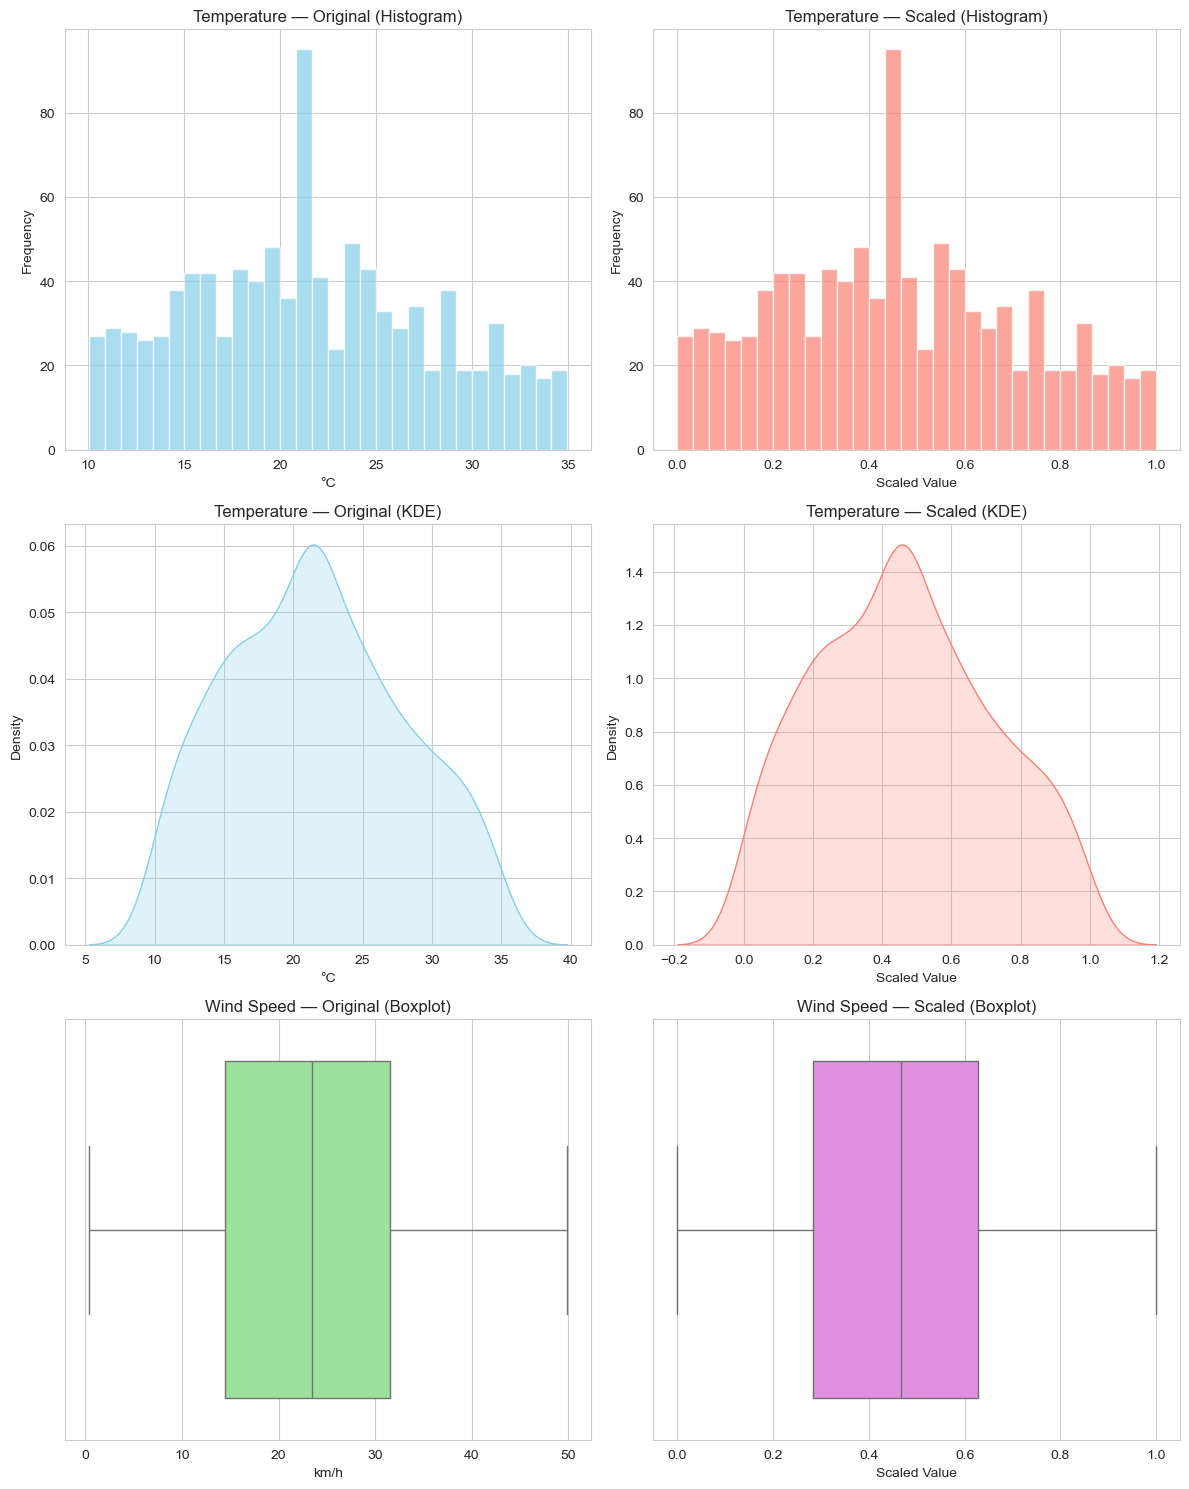

In [207]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Use a style for better visuals
sns.set_style("whitegrid")

# 1. Load the cleaned dataset
df = pd.read_csv('WeatherData_Cleaned.csv')

# 2. Identify numeric columns (drop Station_ID if present)
numeric_cols = (
  df.select_dtypes(include='number')
    .drop(columns=['Station_ID'], errors='ignore')
    .columns
)

# 3. Backup original series
temps_orig = df['Temperature_C']
wind_orig  = df['Wind_Speed_kmh']

# 4. Scale all numeric features with Min–Max
scaler = MinMaxScaler()
df_scaled = df.copy()
df_scaled[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# 5. Extract the scaled series
temps_scaled = df_scaled['Temperature_C']
wind_scaled  = df_scaled['Wind_Speed_kmh']

# 6. Create a 3x2 grid of plots:
fig, axes = plt.subplots(3, 2, figsize=(12, 15))

# Row 0: Histograms for Temperature
axes[0, 0].hist(temps_orig, bins=30, color='skyblue', alpha=0.7)
axes[0, 0].set(title='Temperature — Original (Histogram)', xlabel='°C', ylabel='Frequency')

axes[0, 1].hist(temps_scaled, bins=30, color='salmon', alpha=0.7)
axes[0, 1].set(title='Temperature — Scaled (Histogram)', xlabel='Scaled Value', ylabel='Frequency')

# Row 1: KDE plots for Temperature
sns.kdeplot(temps_orig, ax=axes[1, 0], fill=True, color='skyblue')
axes[1, 0].set(title='Temperature — Original (KDE)', xlabel='°C')

sns.kdeplot(temps_scaled, ax=axes[1, 1], fill=True, color='salmon')
axes[1, 1].set(title='Temperature — Scaled (KDE)', xlabel='Scaled Value')

# Row 2: Boxplots for Wind Speed
sns.boxplot(x=wind_orig, ax=axes[2, 0], color='lightgreen')
axes[2, 0].set(title='Wind Speed — Original (Boxplot)', xlabel='km/h')

sns.boxplot(x=wind_scaled, ax=axes[2, 1], color='violet')
axes[2, 1].set(title='Wind Speed — Scaled (Boxplot)', xlabel='Scaled Value')

plt.tight_layout()
plt.show()


### 9.2 Qualitative Comparison: Original vs. Min–Max Scaled Features
---
***Temperature Histograms***

* *Value Range*

* *Original*: Spans the true Celsius scale (roughly –10 °C to 50 °C).

* *Scaled*: Maps that same distribution into the [0, 1] interval, collapsing absolute units but preserving every data point’s relative standing.

* *Distributional Shape* Both versions exhibit the same peaks, skewness, and multimodal structure—only the numerical axis shifts from real-world degrees to a normalized scale.

* *Wind Speed Boxplots*

 * *Spread & Quantiles*
 * *Original*: Boxplot reflects km/h spread—median, IQR, whiskers, and outliers at their true magnitudes.

 * *Scaled*: Those same quantiles are resituated between 0 and 1, so the box’s shape and the order of outliers remain identical, but the   physical distances (e.g., how many km/h between whiskers and extremes) are no longer visible.

* *Outlier Hierarchy*

Both plots rank the most extreme values correctly; however, only the original version conveys how far those outliers lie from the bulk of the data in real units.

* *Key Takeaways*

* *Modeling Advantage*: Min–Max scaling aligns heterogeneous features onto a common numeric range, which often improves convergence and stability for algorithms (especially those relying on gradient descent).

* *Interpretability Trade-off*: While the normalization fully preserves each feature’s shape—skew, modality, and relative outlier ranking—it sacrifices direct interpretability of the original units.

* *Practical Guidance*: Use Min–Max when your model benefits from uniform feature scales, but retain or archive the original data if you’ll need to report or reason about actual temperatures (°C) or wind speeds (km/h) later.